<a href="https://colab.research.google.com/github/navneet1395/ml-project/blob/main/genre_detection_from_poster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tmdbsimple
!pip install wget
!pip install IMDbPY


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=7090cfe6dcc461163baecd5f07677f22f23e0c3c5c2b537e4143780bcaec6011
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 298 kB 5.1 MB/s 


In [ ]:
import urllib
import requests
import json
import imdb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [ ]:
poster_folder='posters_final/'
if poster_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+poster_folder)

Folder already exists


In [ ]:
api_key = '1f2f3d4dbfe6e7814fa8eacd42ce24e4' 

tmdb.API_KEY = api_key 
search = tmdb.Search() 
import os.path


def grab_poster_tmdb(movie):
    
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    posterp=movie.info()['poster_path']
    title=movie.info()['original_title']
    
    url='image.tmdb.org/t/p/original'+posterp
    title='_'.join(title.split(' '))
    strcmd='wget -O '+poster_folder+title+'.jpg '+url
    os.system(strcmd)

def get_movie_id_tmdb(movie):
    response = search.movie(query=movie)
    movie_id=response['results'][0]['id']
    return movie_id

def get_movie_info_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    info=movie.info()
    return info

def get_movie_genres_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres

In [ ]:
poster_folder

'posters_final/'

In [ ]:
print (get_movie_genres_tmdb("The Matrix"))

[{'id': 28, 'name': 'Action'}, {'id': 878, 'name': 'Science Fiction'}]


In [ ]:
info = get_movie_info_tmdb("The Matrix")
print ("All the Movie information from TMDB gets stored in a dictionary with the following keys for easy access -"
, info.keys())

All the Movie information from TMDB gets stored in a dictionary with the following keys for easy access - dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])


In [ ]:
info=get_movie_info_tmdb("The Matrix")
print (info['tagline'])


Welcome to the Real World.


In [ ]:
imbd_object = imdb.IMDb() # by default access the web.

# Search for a movie (get a list of Movie objects).
results = imbd_object.search_movie('The Matrix')

# As this returns a list of all movies containing the word "The Matrix", we pick the first element
movie = results[0]

imbd_object.update(movie)

print ("All the information we can get about this movie from IMDB-",movie.keys())

All the information we can get about this movie from IMDB- ['title', 'kind', 'year', 'cover url', 'localized title', 'cast', 'genres', 'runtimes', 'countries', 'country codes', 'language codes', 'color info', 'aspect ratio', 'sound mix', 'box office', 'certificates', 'original air date', 'rating', 'votes', 'imdbID', 'plot outline', 'languages', 'directors', 'writers', 'producers', 'composers', 'cinematographers', 'editors', 'editorial department', 'casting directors', 'production designers', 'art directors', 'set decorators', 'costume designers', 'make up department', 'production managers', 'assistant directors', 'art department', 'sound department', 'special effects', 'visual effects', 'stunts', 'camera department', 'animation department', 'casting department', 'costume departmen', 'location management', 'music department', 'script department', 'transportation department', 'miscellaneous', 'akas', 'writer', 'director', 'top 250 rank', 'production companies', 'distributors', 'special e

In [ ]:
print ("The genres associated with the movie are - ",movie['genres'])

The genres associated with the movie are -  ['Action', 'Sci-Fi']


In [ ]:
print ("The genres for The Matrix pulled from IMDB are -",movie['genres'])
print ("The genres for The Matrix pulled from TMDB are -",get_movie_genres_tmdb("The Matrix"))

The genres for The Matrix pulled from IMDB are - ['Action', 'Sci-Fi']
The genres for The Matrix pulled from TMDB are - [{'id': 28, 'name': 'Action'}, {'id': 878, 'name': 'Science Fiction'}]


In [ ]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()

print(len(top_movies['results']))
top20_movs=top_movies['results']

20


In [ ]:
first_movie=top20_movs[0]
print ("Here is all the information you can get on this movie - ")
print (first_movie)
print ("\n\nThe title of the first movie is - ", first_movie['title'])

Here is all the information you can get on this movie - 
{'adult': False, 'backdrop_path': '/lNyLSOKMMeUPr1RsL4KcRuIXwHt.jpg', 'genre_ids': [878, 28, 12], 'id': 580489, 'original_language': 'en', 'original_title': 'Venom: Let There Be Carnage', 'overview': 'After finding a host body in investigative reporter Eddie Brock, the alien symbiote must face a new enemy, Carnage, the alter ego of serial killer Cletus Kasady.', 'popularity': 4896.295, 'poster_path': '/rjkmN1dniUHVYAtwuV3Tji7FsDO.jpg', 'release_date': '2021-09-30', 'title': 'Venom: Let There Be Carnage', 'video': False, 'vote_average': 6.8, 'vote_count': 1765}


The title of the first movie is -  Venom: Let There Be Carnage


In [ ]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    title=mov['title']
    print(title)
    if i==4:
        break

Venom: Let There Be Carnage
Dune
Eternals
Army of Thieves
Free Guy


In [ ]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    genres=mov['genre_ids']
    print(genres)
    if i==4:
        break

[878, 28, 12]
[878, 12]
[28, 12, 878]
[28, 80, 53]
[35, 28, 12, 878]


In [ ]:
# Create a tmdb genre object!
genres=tmdb.Genres()
# the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
list_of_genres=genres.movie_list()['genres']

In [ ]:
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name

In [ ]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    title=mov['title']
    genre_ids=mov['genre_ids']
    genre_names=[]
    for id in genre_ids:
        genre_name=Genre_ID_to_name[id]
        genre_names.append(genre_name)
    print (title,genre_names)
    if i==4:
        break

Venom: Let There Be Carnage ['Science Fiction', 'Action', 'Adventure']
Dune ['Science Fiction', 'Adventure']
Eternals ['Action', 'Adventure', 'Science Fiction']
Army of Thieves ['Action', 'Crime', 'Thriller']
Free Guy ['Comedy', 'Action', 'Adventure', 'Science Fiction']


In [ ]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()


len(top_movies['results'])
top20_movs=top_movies['results']


In [ ]:
all_movies=tmdb.Movies()
top1000_movies=[]
print('Pulling movie list, Please wait...')
for i in range(1,51):
    if i%15==0:
        time.sleep(7)
    movies_on_this_page=all_movies.popular(page=i)['results']
    top1000_movies.extend(movies_on_this_page)
len(top1000_movies)
f3=open('movie_list.pckl','wb')
pickle.dump(top1000_movies,f3)
f3.close()
print('Done!')

Pulling movie list, Please wait...
Done!


In [ ]:
f3=open('movie_list.pckl','rb')
top1000_movies=pickle.load(f3)
f3.close()

In [ ]:
def list2pairs(l):
    
    pairs = list(itertools.combinations(l, 2))
    
    for i in l:
        pairs.append([i,i])
    return pairs

In [ ]:
allPairs = []
for movie in top1000_movies:
    allPairs.extend(list2pairs(movie['genre_ids']))
    
nr_ids = np.unique(allPairs)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
for p in allPairs:
    visGrid[np.argwhere(nr_ids==p[0]), np.argwhere(nr_ids==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids==p[0])]+=1

In [ ]:
print (visGrid.shape)
print (len(Genre_ID_to_name.keys()))

(19, 19)
19


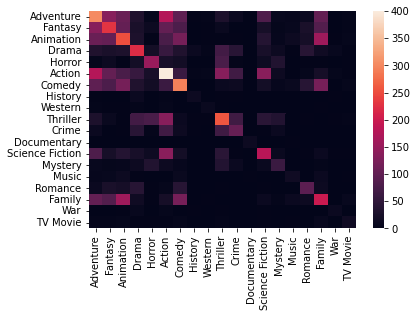

In [ ]:
annot_lookup = []
for i in range(len(nr_ids)):
    annot_lookup.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

In [ ]:
from sklearn.cluster import SpectralCoclustering

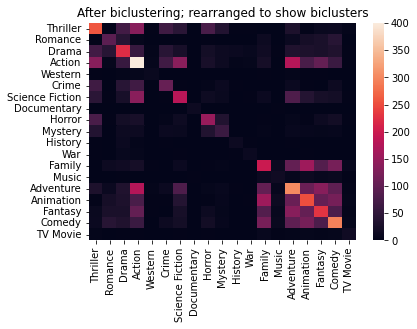

In [ ]:

model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(Genre_ID_to_name[nr_ids[i]])
    
sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [ ]:
movies = []
baseyear = 2017

print('Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...')
done_ids=[]
for g_id in nr_ids:
    #print('Pulling movies for genre ID '+g_id)
    baseyear -= 1
    for page in range(1,6,1):
        time.sleep(0.5)
    
        url = 'https://api.themoviedb.org/3/discover/movie?api_key=' + api_key
        url += '&language=en-US&sort_by=popularity.desc&year=' + str(baseyear) 
        url += '&with_genres=' + str(g_id) + '&page=' + str(page)

        data = urllib.request.urlopen(url).read()

        dataDict = json.loads(data)
        
        movies.extend(dataDict["results"])
    done_ids.append(str(g_id))
print("Pulled movies for genres - "+','.join(done_ids))

Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...
Pulled movies for genres - 12,14,16,18,27,28,35,36,37,53,80,99,878,9648,10402,10749,10751,10752,10770


In [ ]:
f6=open("movies_for_posters",'wb')
pickle.dump(movies,f6)
f6.close()


In [ ]:
f6=open("movies_for_posters",'rb')
movies=pickle.load(f6)
f6.close()

In [ ]:
movie_ids = [m['id'] for m in movies]
print ("originally we had ",len(movie_ids)," movies")
movie_ids=np.unique(movie_ids)
print (len(movie_ids))
seen_before=[]
no_duplicate_movies=[]
for i in range(len(movies)):
    movie=movies[i]
    id=movie['id']
    if id in seen_before:
        continue

        print ("Seen before")
    else:
        seen_before.append(id)
        no_duplicate_movies.append(movie)
print("After removing duplicates we have ",len(no_duplicate_movies), " movies")

originally we had  1826  movies
1702
After removing duplicates we have  1702  movies


In [ ]:
poster_movies=[]
counter=0
movies_no_poster=[]
print("Total movies : ",len(movies))
print("Started downloading posters...")
for movie in movies:
    id=movie['id']
    title=movie['title']
    if counter==1:
        print('Downloaded first. Code is working fine. Please wait, this will take quite some time...')
    if counter%300==0 and counter!=0:
        print ("Done with ",counter," movies!")
        print("Trying to get poster for ",title)
    try:
        grab_poster_tmdb(title)
        poster_movies.append(movie)
    except:
        try:
            time.sleep(7)
            grab_poster_tmdb(title)
            poster_movies.append(movie)
        except:
            movies_no_poster.append(movie)
    counter+=1
print("Done with all the posters!")

Total movies :  1826
Started downloading posters...
Downloaded first. Code is working fine. Please wait, this will take quite some time...
Done with  300  movies!
Trying to get poster for  Warrior
Done with  600  movies!
Trying to get poster for  Toy Story
Done with  900  movies!
Trying to get poster for  No Country for Old Men
Done with  1200  movies!
Trying to get poster for  Vanilla Sky
Done with  1500  movies!
Trying to get poster for  Serendipity
Done with  1800  movies!
Trying to get poster for  The Return of Winnetou
Done with all the posters!


In [ ]:
print (len(movies_no_poster))
print (len(poster_movies))

30
1796


In [ ]:
f=open('poster_movies.pckl','wb')
pickle.dump(poster_movies,f)
f.close()

In [ ]:
f=open('poster_movies.pckl','rb')
poster_movies=pickle.load(f)
f.close()

In [ ]:
f=open('no_poster_movies.pckl','wb')
pickle.dump(movies_no_poster,f)
f.close()

In [ ]:
f=open('no_poster_movies.pckl','rb')
movies_no_poster=pickle.load(f)
f.close()

In [ ]:
movies_with_overviews=[]
for i in range(len(no_duplicate_movies)):
    movie=no_duplicate_movies[i]
    id=movie['id']
    overview=movie['overview']
    
    if len(overview)==0:
        continue
    else:
        movies_with_overviews.append(movie)
        
len(movies_with_overviews)

1693

In [ ]:
genres=[]
all_ids=[]
for i in range(len(movies_with_overviews)):
    movie=movies_with_overviews[i]
    id=movie['id']
    genre_ids=movie['genre_ids']
    genres.append(genre_ids)
    all_ids.extend(genre_ids)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genres)

In [ ]:
genres[1]

[28, 12, 14]

In [ ]:
print(Y.shape)
print (np.sum(Y, axis=0))

(1693, 19)
[384 280 291 636 208 493 448 149  71 406 233 132 254 191 147 232 303 119
 141]


In [ ]:
len(list_of_genres)

19

In [ ]:
genres=tmdb.Genres()

list_of_genres=genres.movie_list()['genres']
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name

In [ ]:
for i in set(all_ids):
    if i not in Genre_ID_to_name.keys():
        print(i)

In [ ]:
Genre_ID_to_name[10769]="Foreign"

In [ ]:
len(Genre_ID_to_name.keys())

20

In [ ]:
sample_movie=movies_with_overviews[5]
sample_overview=sample_movie['overview']
sample_title=sample_movie['title']
print ("The overview for the movie",sample_title," is - \n\n")
print (sample_overview)

The overview for the movie Harry Potter and the Deathly Hallows: Part 1  is - 


Harry, Ron and Hermione walk away from their last year at Hogwarts to find and destroy the remaining Horcruxes, putting an end to Voldemort's bid for immortality. But with Harry's beloved Dumbledore dead and Voldemort's unscrupulous Death Eaters on the loose, the world is more dangerous than ever.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [ ]:
content=[]
for i in range(len(movies_with_overviews)):
    movie=movies_with_overviews[i]
    id=movie['id']
    overview=movie['overview']
    overview=overview.replace(',','')
    overview=overview.replace('.','')
    content.append(overview)

In [ ]:
print (content[0])
print (len(content))

The seemingly invincible Spider-Man goes up against an all-new crop of villains—including the shape-shifting Sandman While Spider-Man’s superpowers are altered by an alien organism his alter ego Peter Parker deals with nemesis Eddie Brock and also gets caught up in a love triangle
1693


In [ ]:
get_movie_info_tmdb('The Matrix')['overview']

'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.'

In [ ]:
vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
X=vectorize.fit_transform(content)

In [ ]:
X.shape

(1693, 1201)

In [ ]:
import pickle
f4=open('X.pckl','wb')
f5=open('Y.pckl','wb')
pickle.dump(X,f4)
pickle.dump(Y,f5)
f6=open('Genredict.pckl','wb')
pickle.dump(Genre_ID_to_name,f6)
f4.close()
f5.close()
f6.close()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.shape

(1693, 1201)

In [ ]:
msk = np.random.rand(X_tfidf.shape[0]) < 0.8

In [ ]:
X_train_tfidf=X_tfidf[msk]
X_test_tfidf=X_tfidf[~msk]
Y_train=Y[msk]
Y_test=Y[~msk]
positions=range(len(movies_with_overviews))
# print positions
test_movies=np.asarray(positions)[~msk]
# test_movies

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

In [ ]:
parameters = {'kernel':['linear'], 'C':[0.01, 0.1, 1.0]}
gridCV = GridSearchCV(SVC(class_weight='balanced'), parameters, scoring=make_scorer(f1_score, average='micro'))
classif = OneVsRestClassifier(gridCV)

classif.fit(X_train_tfidf, Y_train)

OneVsRestClassifier(estimator=GridSearchCV(cv=None, error_score=nan,
                                           estimator=SVC(C=1.0,
                                                         break_ties=False,
                                                         cache_size=200,
                                                         class_weight='balanced',
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3,
                                                         gamma='scale',
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=False,
                                                         random_state=None,
                                                 

In [ ]:
predstfidf=classif.predict(X_test_tfidf)

print (classification_report(Y_test, predstfidf))

              precision    recall  f1-score   support

           0       0.30      0.39      0.34        84
           1       0.00      0.00      0.00        62
           2       0.39      0.57      0.46        58
           3       0.56      0.55      0.56       148
           4       0.40      0.53      0.46        43
           5       0.51      0.64      0.57       106
           6       0.48      0.63      0.54        99
           7       0.31      0.27      0.29        33
           8       0.50      0.20      0.29        15
           9       0.39      0.55      0.46        74
          10       0.50      0.40      0.44        55
          11       0.54      0.65      0.59        23
          12       0.62      0.50      0.56        60
          13       0.32      0.33      0.32        43
          14       0.76      0.46      0.57        35
          15       0.35      0.41      0.38        41
          16       0.42      0.63      0.51        65
          17       0.54    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
genre_list=sorted(list(Genre_ID_to_name.keys()))


In [ ]:
predictions=[]
for i in range(X_test_tfidf.shape[0]):
    pred_genres=[]
    movie_label_scores=predstfidf[i]
#     print movie_label_scores
    for j in range(19):
        #print j
        if movie_label_scores[j]!=0:
            genre=Genre_ID_to_name[genre_list[j]]
            pred_genres.append(genre)
    predictions.append(pred_genres)

In [ ]:
import pickle
f=open('classifer_svc','wb')
pickle.dump(classif,f)
f.close()

In [ ]:
for i in range(X_test_tfidf.shape[0]):
    if i%50==0 and i!=0:
        print('MOVIE: ',movies_with_overviews[i]['title'],'\tPREDICTION: ',','.join(predictions[i]))

MOVIE:  Kung Fu Panda 3 	PREDICTION:  Adventure,Animation,Comedy,Family
MOVIE:  Abraham Lincoln: Vampire Hunter 	PREDICTION:  Drama,Action,Comedy,Family
MOVIE:  The Boxtrolls 	PREDICTION:  Drama,Horror,Mystery,Romance
MOVIE:  The Emperor's New Groove 	PREDICTION:  Documentary
MOVIE:  The Wind Rises 	PREDICTION:  Animation,Drama,Comedy,Romance,Family
MOVIE:  Carrie 	PREDICTION:  Thriller
MOVIE:  The Secret Life of Walter Mitty 	PREDICTION:  Horror,Comedy,Thriller,Crime,Mystery


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifnb = OneVsRestClassifier(MultinomialNB())
classifnb.fit(X[msk].toarray(), Y_train)
predsnb=classifnb.predict(X[~msk].toarray())

In [ ]:
import pickle
f2=open('classifer_nb','wb')
pickle.dump(classifnb,f2)
f2.close()

In [ ]:
predictionsnb=[]
for i in range(X_test_tfidf.shape[0]):
    pred_genres=[]
    movie_label_scores=predsnb[i]
    for j in range(19):
        #print j
        if movie_label_scores[j]!=0:
            genre=Genre_ID_to_name[genre_list[j]]
            pred_genres.append(genre)
    predictionsnb.append(pred_genres)

In [ ]:
for i in range(X_test_tfidf.shape[0]):
    if i%50==0 and i!=0:
        print ('MOVIE: ',movies_with_overviews[i]['title'],'\tPREDICTION: ',','.join(predictionsnb[i]))

MOVIE:  Kung Fu Panda 3 	PREDICTION:  Fantasy,Animation,Comedy,Family
MOVIE:  Abraham Lincoln: Vampire Hunter 	PREDICTION:  Drama,Action,Comedy,Family
MOVIE:  The Boxtrolls 	PREDICTION:  Drama,Comedy,Romance
MOVIE:  The Emperor's New Groove 	PREDICTION:  Documentary
MOVIE:  The Wind Rises 	PREDICTION:  Animation,Drama,Comedy,Romance,Family
MOVIE:  Carrie 	PREDICTION:  Romance
MOVIE:  The Secret Life of Walter Mitty 	PREDICTION:  Drama,Horror,Western,Thriller,Crime,Mystery


In [ ]:
def precision_recall(gt,preds):
    TP=0
    FP=0
    FN=0
    for t in gt:
        if t in preds:
            TP+=1
        else:
            FN+=1
    for p in preds:
        if p not in gt:
            FP+=1
    if TP+FP==0:
        precision=0
    else:
        precision=TP/float(TP+FP)
    if TP+FN==0:
        recall=0
    else:
        recall=TP/float(TP+FN)
    return precision,recall

In [ ]:
precs=[]
recs=[]
for i in range(len(test_movies)):
    if i%1==0:
        pos=test_movies[i]
        test_movie=movies_with_overviews[pos]
        gtids=test_movie['genre_ids']
        gt=[]
        for g in gtids:
            g_name=Genre_ID_to_name[g]
            gt.append(g_name)
#         print predictions[i],movies_with_overviews[i]['title'],gt
        a,b=precision_recall(gt,predictions[i])
        precs.append(a)
        recs.append(b)

print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.4507353911093523 0.49043332014246144


In [ ]:
precs=[]
recs=[]
for i in range(len(test_movies)):
    if i%1==0:
        pos=test_movies[i]
        test_movie=movies_with_overviews[pos]
        gtids=test_movie['genre_ids']
        gt=[]
        for g in gtids:
            g_name=Genre_ID_to_name[g]
            gt.append(g_name)
#         print predictions[i],movies_with_overviews[i]['title'],gt
        a,b=precision_recall(gt,predictionsnb[i])
        precs.append(a)
        recs.append(b)

print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))


0.4950600184672207 0.5217385569186124


In [ ]:
f=open('poster_movies.pckl','rb')
poster_movies=pickle.load(f)
f.close()

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pickle
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
allnames=os.listdir(poster_folder)
imnames=[j for j in allnames if j.endswith('.jpg')]
feature_list=[]
genre_list=[]
file_order=[]
print("Starting extracting VGG features for scraped images. This will take time, Please be patient...")
print ("Total images = ",len(imnames))
failed_files=[]
succesful_files=[]
i=0
for mov in poster_movies:
    i+=1
    mov_name=mov['original_title']
    mov_name1=mov_name.replace(':','/')
    poster_name=mov_name.replace(' ','_')+'.jpg'
    #print(poster_name)
    if poster_name in imnames:
        img_path=poster_folder+poster_name
        try:
          img = image.load_img(img_path, target_size=(224, 224))
          succesful_files.append(poster_name)
          x = image.img_to_array(img)
          x = np.expand_dims(x, axis=0)
          x = preprocess_input(x)
          features = model.predict(x)
          print (features.shape)
          print (model.predict(x))
          file_order.append(img_path)
          feature_list.append(features)
          genre_list.append(mov['genre_ids'])
          if np.max(np.asarray(feature_list))==0.0:
            print('problematic',i)
          if i%250==0 or i==1:
            print ("Working on Image : ",i)
        except:
            failed_files.append(poster_name)
            
            continue
        
    else:
        continue
print ("Done with all features, please pickle for future use!")

Streaming output truncated to the last 5000 lines.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]]]
(1, 7, 7, 512)
[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          1.2062364
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          9.289542
     3.0430954 ]
   [ 0.          0.          0.         ...  0.         12.377447
     0.        ]
   [ 0.          0.          0.         ...  0.          3.1900918
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0

In [ ]:
len(genre_list)

1553

In [ ]:
len(feature_list)


1553

In [ ]:
print (type(feature_list[0]))
feature_list[0].shape

<class 'numpy.ndarray'>


(1, 7, 7, 512)

In [ ]:
list_pickled=(feature_list,file_order,failed_files,succesful_files,genre_list)
f=open('posters_new_features.pckl','wb')
pickle.dump(list_pickled,f)
f.close()
print("Features dumped to pickle file")

Features dumped to pickle file


In [ ]:
f7=open('posters_new_features.pckl','rb')
list_pickled=pickle.load(f7)
f7.close()

In [ ]:
(feature_list,files,failed,succesful,genre_list)=list_pickled

In [ ]:
(a,b,c,d)=feature_list[0].shape
feature_size=a*b*c*d
feature_size

25088

In [ ]:
np_features=np.zeros((len(feature_list),feature_size))
for i in range(len(feature_list)):
    feat=feature_list[i]
    reshaped_feat=feat.reshape(1,-1)
    np_features[i]=reshaped_feat

In [ ]:
np_features[-1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
X=np_features

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genre_list)

In [ ]:
Y.shape

(1553, 19)

In [ ]:
visual_problem_data=(X,Y)
f8=open('visual_problem_data_clean.pckl','wb')
pickle.dump(visual_problem_data,f8)
f8.close()

In [ ]:
f8=open('visual_problem_data_clean.pckl','rb')
visual_features=pickle.load(f8)
f8.close()

In [ ]:
(X,Y)=visual_features

In [ ]:
X.shape

(1553, 25088)

In [ ]:
mask = np.random.rand(len(X)) < 0.8

In [ ]:
X_train=X[mask]
X_test=X[~mask]
Y_train=Y[mask]
Y_test=Y[~mask]

In [ ]:
X_test.shape
Y_test.shape

(336, 19)

In [ ]:
Y_train[115]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras import optimizers
model_visual = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(19),
    Activation('sigmoid'),
])
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)

sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
model_visual.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_visual.fit(X_train, Y_train, epochs=10, batch_size=64,verbose=1)

Epoch 1/10
20/20 [==============================] - 7s 270ms/step - loss: 2.4439 - accuracy: 0.1200
Epoch 2/10
20/20 [==============================] - 5s 267ms/step - loss: 0.3075 - accuracy: 0.3090
Epoch 3/10
20/20 [==============================] - 5s 267ms/step - loss: 0.0958 - accuracy: 0.3558
Epoch 4/10
20/20 [==============================] - 5s 266ms/step - loss: 0.0776 - accuracy: 0.3739
Epoch 5/10
20/20 [==============================] - 5s 274ms/step - loss: 0.0662 - accuracy: 0.3591
Epoch 6/10
20/20 [==============================] - 5s 271ms/step - loss: 0.0497 - accuracy: 0.3722
Epoch 7/10
20/20 [==============================] - 6s 275ms/step - loss: 0.0419 - accuracy: 0.3895
Epoch 8/10
20/20 [==============================] - 5s 269ms/step - loss: 0.0530 - accuracy: 0.3509
Epoch 9/10
20/20 [==============================] - 5s 266ms/step - loss: 0.0358 - accuracy: 0.3615
Epoch 10/10
20/20 [==============================] - 5s 266ms/step - loss: 0.0333 - accuracy: 0.3541

In [ ]:
model_visual.fit(X_train, Y_train, epochs=50, batch_size=64,verbose=0)

In [ ]:
Y_preds=model_visual.predict(X_test)

In [ ]:
sum(sum(Y_preds))

663.1564311981201

In [ ]:
f6=open('Genredict.pckl','rb')
Genre_ID_to_name=pickle.load(f6)
f6.close()

In [ ]:
sum(Y_preds[1])


0.9997553249269232

In [ ]:
sum(Y_preds[2])

1.9156346032248557

In [ ]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [ ]:
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(19):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%50==0:
        print ("Predicted: ",','.join(predicted_genres)," Actual: ",','.join(gt_genre_names))

Predicted:  Adventure,Comedy,Fantasy  Actual:  Adventure,Fantasy,Action
Predicted:  Animation,Adventure,Action  Actual:  Animation,Action,Science Fiction,Family
Predicted:  Animation,Action,Adventure  Actual:  Adventure,Fantasy,Action
Predicted:  Drama,Action,Thriller  Actual:  Action,Western,Science Fiction
Predicted:  Mystery,Music,Documentary  Actual:  Documentary
Predicted:  Comedy,Crime,Music  Actual:  Documentary,Music
Predicted:  Family,Science Fiction,Comedy  Actual:  Adventure,Comedy,Science Fiction,Family


In [ ]:
print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.4831349206349206 0.45214356575963716


In [ ]:
from gensim import models
# model2 = models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 
model2 = models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/AI project/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
print (model2['king'].shape)
print (model2['dog'].shape)


(300,)
(300,)


In [ ]:
final_movies_set = movies_with_overviews
len(final_movies_set)

1693

In [ ]:
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=b3dccb4320580e7328700862016eb77cd142cd5a9037720713cdcb680e16c373
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

In [ ]:
movie_mean_wordvec=np.zeros((len(final_movies_set),300))
movie_mean_wordvec.shape

(1693, 300)

In [ ]:
print(final_movies_set)

[{'adult': False, 'backdrop_path': '/6MQmtWk4cFwSDyNvIgoJRBIHUT3.jpg', 'genre_ids': [14, 28, 12], 'id': 559, 'original_language': 'en', 'original_title': 'Spider-Man 3', 'overview': 'The seemingly invincible Spider-Man goes up against an all-new crop of villains—including the shape-shifting Sandman. While Spider-Man’s superpowers are altered by an alien organism, his alter ego, Peter Parker, deals with nemesis Eddie Brock and also gets caught up in a love triangle.', 'popularity': 203.357, 'poster_path': '/sqZKCRYGovZ8aN99VVJSdL8Ja9k.jpg', 'release_date': '2007-05-01', 'title': 'Spider-Man 3', 'video': False, 'vote_average': 6.3, 'vote_count': 10477}, {'adult': False, 'backdrop_path': '/iWrDibFusV4JEz5Qw79RuWSGfX4.jpg', 'genre_ids': [28, 12, 14], 'id': 102382, 'original_language': 'en', 'original_title': 'The Amazing Spider-Man 2', 'overview': 'For Peter Parker, life is busy. Between taking out the bad guys as Spider-Man and spending time with the person he loves, Gwen Stacy, high scho

In [ ]:
genres=[]
rows_to_delete=[]
for i in range(len(final_movies_set)):
    mov=final_movies_set[i]
    
    movie_genres=mov['genre_ids']
    genres.append(movie_genres)
    overview=mov['overview']
    tokens = tokenizer.tokenize(overview)
    stopped_tokens = [k for k in tokens if not k in en_stop]
    count_in_vocab=0
    s=0
    if len(stopped_tokens)==0:
        rows_to_delete.append(i)
        genres.pop(-1)
        print (overview)
        print ("sample ",i,"had no nonstops")
    else:
        for tok in stopped_tokens:
            if tok.lower() in model2.vocab:
                count_in_vocab+=1
                s+=model2[tok.lower()]
        if count_in_vocab!=0:
            movie_mean_wordvec[i]=s/float(count_in_vocab)
        else:
            rows_to_delete.append(i)
            genres.pop(-1)
            print (overview)
            print ("sample ",i,"had no word2vec")

In [ ]:
len(genres)

1693

In [ ]:
mask2=[]
for row in range(len(movie_mean_wordvec)):
    if row in rows_to_delete:
        mask2.append(False)
    else:
        mask2.append(True)

In [ ]:
X=movie_mean_wordvec[mask2]


In [ ]:
X.shape

(1693, 300)

In [ ]:
Y=mlb.fit_transform(genres)

In [ ]:
Y.shape

(1693, 19)

In [ ]:
textual_features=(X,Y)
f9=open('textual_features.pckl','wb')
pickle.dump(textual_features,f9)
f9.close()

In [ ]:
textual_features=(X,Y)
f9=open('textual_features.pckl','rb')
textual_features=pickle.load(f9)
f9.close()

In [ ]:
(X,Y)=textual_features

In [ ]:
X.shape

(1693, 300)

In [ ]:
Y.shape

(1693, 19)

In [ ]:
mask_text=np.random.rand(len(X))<0.8

In [ ]:
X_train=X[mask_text]
Y_train=Y[mask_text]
X_test=X[~mask_text]
Y_test=Y[~mask_text]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_textual = Sequential([
    Dense(300, input_shape=(300,)),
    Activation('relu'),
    Dense(19),
    Activation('softmax'),
])

model_textual.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model_textual.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
3/3 [==============================] - 1s 9ms/step - loss: 0.6608 - accuracy: 0.2894
Epoch 2/10
3/3 [==============================] - 0s 10ms/step - loss: 0.5601 - accuracy: 0.3071
Epoch 3/10
3/3 [==============================] - 0s 10ms/step - loss: 0.4855 - accuracy: 0.3071
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 0.4442 - accuracy: 0.3071
Epoch 5/10
3/3 [==============================] - 0s 12ms/step - loss: 0.4233 - accuracy: 0.3071
Epoch 6/10
3/3 [==============================] - 0s 9ms/step - loss: 0.4125 - accuracy: 0.3071
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.4059 - accuracy: 0.3085
Epoch 8/10
3/3 [==============================] - 0s 9ms/step - loss: 0.4013 - accuracy: 0.3100
Epoch 9/10
3/3 [==============================] - 0s 9ms/step - loss: 0.3975 - accuracy: 0.3093
Epoch 10/10
3/3 [==============================] - 0s 9ms/step - loss: 0.3938 - accuracy: 0.3049


In [ ]:
model_textual.fit(X_train, Y_train, epochs=10000, batch_size=500,verbose=0)


In [ ]:
score = model_textual.evaluate(X_test, Y_test, batch_size=249)

2/2 [==============================] - 0s 7ms/step - loss: 1.9578 - accuracy: 0.2597


In [ ]:
print("%s: %.2f%%" % (model_textual.metrics_names[1], score[1]*100))

accuracy: 25.97%


In [ ]:
Y_preds=model_textual.predict(X_test)

In [ ]:
print(Y_preds)

[[2.7618394e-10 9.9998891e-01 4.1656531e-14 ... 9.4671538e-14
  3.9170935e-36 9.4658124e-19]
 [9.9992001e-01 9.8579727e-15 1.8881618e-06 ... 7.8848446e-13
  1.3505845e-22 6.8214049e-18]
 [3.3196254e-30 8.0109962e-36 5.7828582e-30 ... 0.0000000e+00
  2.1848942e-36 4.3672344e-35]
 ...
 [5.8856471e-14 0.0000000e+00 0.0000000e+00 ... 3.8084924e-32
  1.2678314e-31 2.3304460e-34]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0290280e-38
  0.0000000e+00 4.8664695e-19]
 [6.5066383e-06 9.7335331e-02 1.4452152e-18 ... 1.6648524e-28
  3.0428429e-32 3.9347299e-07]]


In [ ]:
genre_list.append(10769)

In [ ]:
print ("Our predictions for the movies are - \n")
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(19):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%50==0:
        print ("Predicted: ",predicted_genres," Actual: ",gt_genre_names)

Our predictions for the movies are - 

Predicted:  ['Adventure', 'Comedy', 'Fantasy']  Actual:  ['Adventure', 'Fantasy', 'Action']
Predicted:  ['Animation', 'Adventure', 'Action']  Actual:  ['Animation', 'Action', 'Science Fiction', 'Family']
Predicted:  ['Animation', 'Action', 'Adventure']  Actual:  ['Adventure', 'Fantasy', 'Action']
Predicted:  ['Drama', 'Action', 'Thriller']  Actual:  ['Action', 'Western', 'Science Fiction']
Predicted:  ['Mystery', 'Music', 'Documentary']  Actual:  ['Documentary']
Predicted:  ['Comedy', 'Crime', 'Music']  Actual:  ['Documentary', 'Music']
Predicted:  ['Family', 'Science Fiction', 'Comedy']  Actual:  ['Adventure', 'Comedy', 'Science Fiction', 'Family']


In [ ]:
print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.5393034825870646 0.5807569296375267
